In [1]:
import pandas as pd
from utils.preprocess import preprocess_ex1

In [13]:
df = pd.read_csv('data/01_input_history.csv')

df_train_null, df_train_inactive, df_train_active, df_validation = preprocess_ex1(df)

In [3]:
len(df_train_active['unique_id'].unique())

405

In [7]:
from dtaidistance import dtw, clustering
from utilsforecast.preprocessing import fill_gaps

In [14]:
df_train_active_filled = fill_gaps(df_train_active, start="global", end="global", freq='MS')

In [15]:
df_train_active_filled.fillna(0, inplace=True)

In [18]:
df_train_active_filled.shape[0]/405
X = df_train_active_filled['Quantity'].values.reshape(405, -1)
X

array([[   0.,    0.,    0., ...,  815.,  855.,  872.],
       [   0.,    0.,    0., ..., 2089., 1867., 1861.],
       [   0.,    0.,    0., ..., 1305., 1249., 1221.],
       ...,
       [   0.,    0.,    0., ..., 1838., 1733., 1747.],
       [   0.,    0.,    0., ..., 1679., 1720., 1531.],
       [   0.,    0.,    0., ..., 1902., 1840., 1852.]])

In [19]:
model2 = clustering.HierarchicalTree(dists_fun=dtw.distance_matrix_fast, dists_options={})
cluster_idx = model2.fit(X[:30,:])

 97%|█████████▋| 29/30 [00:00<00:00, 26242.68it/s]


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

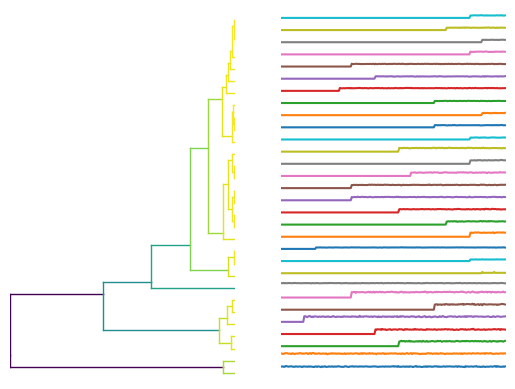

In [20]:
model2.plot()

In [12]:
from dtaidistance import dtw
import numpy as np
s1 = np.array([0.0, 0, 1, 2, 1, 0, 1, 0, 0])
s2 = np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0])
d = dtw.distance_fast(s1, s2)
d

1.4142135623730951